## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

## Importing the dataset

In [2]:
data_path = "/Users/js/Desktop/Personality Prediction Using Deep Learning/mbti_data.csv"
data = pd.read_csv(data_path)

In [3]:
print("Dataset Shape:", data.shape)
print("Columns:", data.columns)
print("\nSample Data:")
print(data.head())

Dataset Shape: (8675, 2)
Columns: Index(['type', 'posts'], dtype='object')

Sample Data:
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


## Visualise class distribution

/var/folders/wv/jwbv3h4s56j81f_b9w5yvc2m0000gn/T/ipykernel_48248/1106829237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['type'], order=data['type'].value_counts().index, palette="viridis")


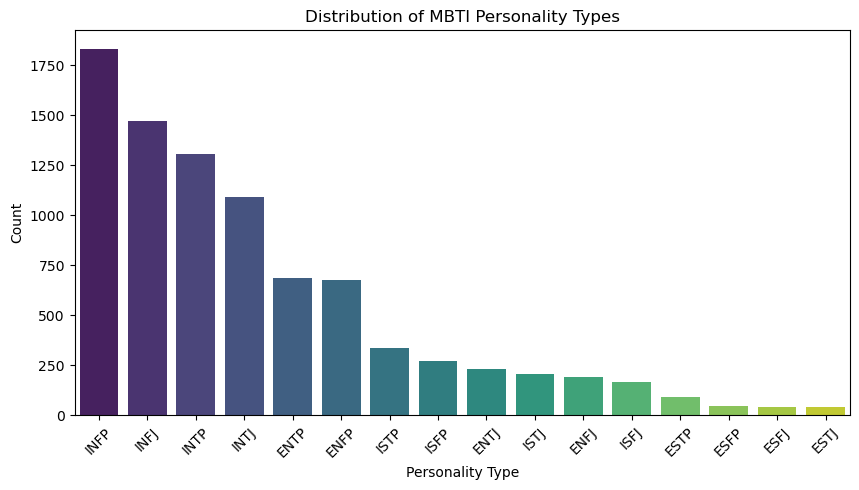

In [4]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['type'], order=data['type'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of MBTI Personality Types")
plt.xlabel("Personality Type")
plt.ylabel("Count")
plt.show()

## Data Cleaning

In [5]:
def clean_text(text):
    """
    Cleans input text by:
    - Removing URLs
    - Removing punctuation
    - Lowercasing words
    """
    regex = re.compile('[%s]' % re.escape('|'))
    text = regex.sub(" ", text)
    words = str(text).split()
    words = [i.lower() for i in words if "http" not in i]  # Remove URLs
    words = " ".join(words)
    words = words.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return words

# Apply text cleaning
data["cleaned_text"] = data["posts"].apply(clean_text)

## Visualize sample cleaned dataset

In [6]:
print("\nSample Cleaned Text:")
print(data["cleaned_text"].values[0])


Sample Cleaned Text:
enfp and intj moments sportscenter not top ten plays pranks what has been the most lifechanging experience in your life on repeat for most of today may the perc experience immerse you the last thing my infj friend posted on his facebook before committing suicide the next day rest in peace hello enfj7 sorry to hear of your distress its only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as 84389 84390  welcome and stuff game set match prozac wellbrutin at least thirty minutes of moving your legs and i dont mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative basically come up with three items youve determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left by all things in moderation sims is indeed a video game and a good one

## Saving the cleaned dataset

In [7]:
data.to_csv("cleaned_mbti_data.csv", index=False)
print("Data Visualization & Cleaning Done!")

Data Visualization & Cleaning Done!
